<a href="https://colab.research.google.com/github/GergelyTuri/context-project/blob/main/notebooks/colocalization_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing RNAsocpe colocalization
* 12/1/2023

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import xml.etree.ElementTree as ET
import seaborn as sns
import numpy as np
from scipy.spatial.distance import cdist


In [ ]:
filelocation="/gdrive/Shareddrives/Turi_lab/Data/psilocybin_project/Stephanies/analysis/date/dual_10_13_23/series_1/Cellcounter_dual_10_13_23_series1.xml"

In [ ]:
tree = ET.parse(filelocation)
root = tree.getroot()

for child in root:
    print(f"Element: {child.tag}, Attribute: {child.get('MarkerX')}")

Element: Image_Properties, Attribute: None
Element: Marker_Data, Attribute: None


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# Create lists to store data
types = []
marker_x_values = []
marker_y_values = []

# Iterate through Marker elements
for marker_type in root.findall('.//Marker_Type'):
    current_type = marker_type.find('Type').text
    for marker in marker_type.findall('.//Marker'):
        marker_x = marker.find('MarkerX').text
        marker_y = marker.find('MarkerY').text

        # Append data to lists
        types.append(current_type)
        marker_x_values.append(marker_x)
        marker_y_values.append(marker_y)

# Create a DataFrame
data = {'Type': types, 'MarkerX': marker_x_values, 'MarkerY': marker_y_values}
df = pd.DataFrame(data)

# Display the DataFrame
df


,Type,MarkerX,MarkerY
0,1,489,68
1,1,474,24
2,1,230,208
3,1,286,258
4,1,445,337
...,...,...,...
85,2,490,550
86,2,426,550
87,2,753,400
88,2,730,457


In [ ]:
df['MarkerX'] = df['MarkerX'].astype(int)
df['MarkerY'] = df['MarkerY'].astype(int)

In [ ]:
# Calculate pairwise distances using scipy's cdist
distances_matrix = cdist(type1_coords, type2_coords)

# Find the closest Type 2 point for each Type 1 point
closest_indices = np.argmin(distances_matrix, axis=1)

# Create a new DataFrame with Type 1 and closest Type 2 coordinates
df_closest = pd.DataFrame({
    'Type1_MarkerX': type1_coords[:, 0],
    'Type1_MarkerY': type1_coords[:, 1],
    'Type2_MarkerX': type2_coords[closest_indices, 0],
    'Type2_MarkerY': type2_coords[closest_indices, 1],
})

# Calculate distances and add a new column
df_closest['Distance'] = np.linalg.norm(df_closest[['Type1_MarkerX', 'Type1_MarkerY']].values -
                                         df_closest[['Type2_MarkerX', 'Type2_MarkerY']].values, axis=1)

# Display the DataFrame with the added 'Distance' column
print(df_closest)

    Type1_MarkerX  Type1_MarkerY  Type2_MarkerX  Type2_MarkerY   Distance
0             489             68            489             49  19.000000
1             474             24            480             23   6.082763
2             230            208            265            138  78.262379
3             286            258            322            260  36.055513
4             445            337            394            313  56.364883
5             394            300            394            313  13.000000
6             394            212            391            230  18.248288
7             337            180            348            184  11.704700
8             602            130            642            125  40.311289
9             566            229            552            285  57.723479
10            530            282            552            285  22.203603
11            614            353            606            344  12.041595
12            488            388      

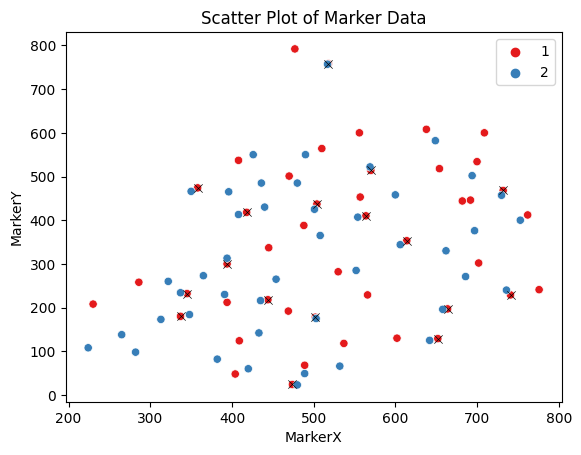

In [ ]:
# Create a scatter plot with seaborn
sns.scatterplot(x='MarkerX', y='MarkerY', hue='Type', data=df, palette='Set1')
sns.scatterplot(x='Type1_MarkerX', y='Type1_MarkerY', data=df_filtered, color='k', marker='x')
# Show the plot
plt.title('Scatter Plot of Marker Data')
plt.show()

<ipython-input-30-a5018df32a34>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Type1_MarkerX', y='Type1_MarkerY', data=df_filtered, palette='Set1')


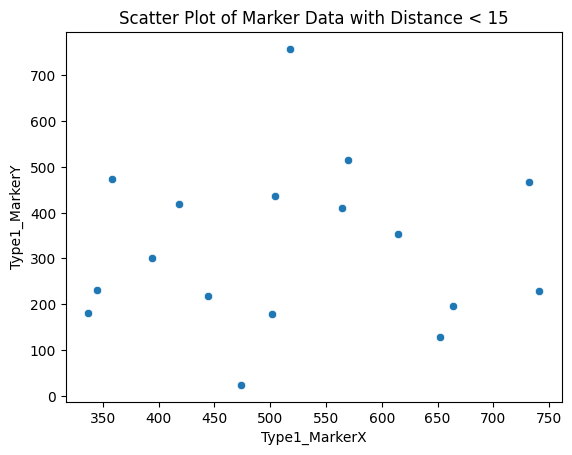

In [ ]:
df_filtered = df_closest[df_closest['Distance'] < 15]

# Create a scatter plot with seaborn for the filtered DataFrame
sns.scatterplot(x='Type1_MarkerX', y='Type1_MarkerY', data=df_filtered, palette='Set1')

# Show the plot
plt.title('Scatter Plot of Marker Data with Distance < 15')
plt.show()